# EE 399
### Ting Jones
### 4/10/23
### HW 1



In [ ]:
# github page: https://github.com/tingjones
# HW 1 repo: https://github.com/tingjones/ee399_hw1

In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from numpy.polynomial import polynomial as P
from numpy.polynomial.polynomial import polyval

## Problem 2i

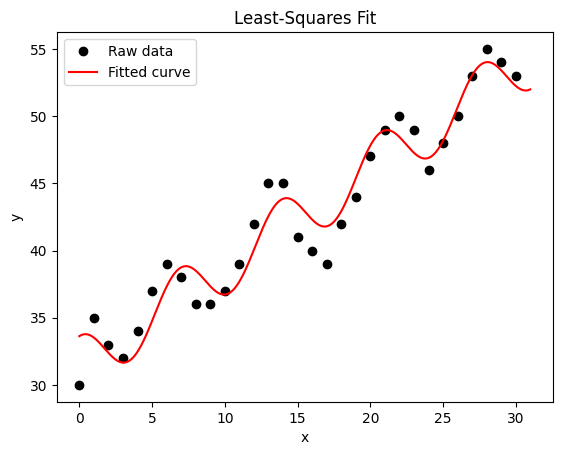

In [ ]:
# given data
x = np.arange(0, 31)
y = np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

# objective function: Acos(Bx) + Cx + D, with coefficients/parameters defined in c
# returns least-squares error
def fit_er(c, x, y):
    model = c[0]*np.cos(c[1]*x)+c[2]*x + c[3]
    er = np.sqrt(np.sum((model-y)**2)/len(x))
    return er

# initial guess for parameters of function
min0 = np.array([3, np.pi/4, 2/3, 32])

# perform optimization
res = opt.minimize(fit_er, min0, args=(x, y))

# store optimized parameters in mins
mins = res.x

# generate data for plot
x2 = np.arange(0, 31, 0.01)
y2 = (mins[0] * np.cos(mins[1] * x2) + mins[2] * x2 + mins[3])

# plot raw data as points, and curve fit as line
plt.figure(1)
plt.plot(x, y, 'ko', label='Raw data')
plt.plot(x2, y2, 'r-', label='Fitted curve')
plt.title("Least-Squares Fit")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [ ]:
print("A:", mins[0], "B:", mins[1], "C:", mins[2], "D:", mins[3])
print("Minimum Error:", fit_er(mins, x, y))

A: 2.171726827780497 B: 0.9093254573519091 C: 0.7324879735143766 D: 31.452780811493803
Minimum Error: 1.59272585028836


## Problem 2ii

In [ ]:
# constant, allow for changing of original data
L = len(x)

In [ ]:
# find the error depending on which parameters are being swept
# since checking in order of a, b, c, d, only one of sweep parameters needs to be known to control index
def find_err(param, sweep):
  a, b, c, d = param

  # store calculated error
  err_fix = np.zeros((L,L))

  # store parameter values, depending on which are swept or fixed
  c_fix = np.zeros((4, L))
  
  # possible combinations for fixing two parameters: ab, ac, ad, bc, bd, cd
  # returns 2d array of calculated errors
  for i in range(0, L):
    for j in range(0, L):
      c_fix[3] = d[j]
      if (sweep == 0): # sweep a
        c_fix[0], c_fix[1], c_fix[2] = a[i], b[j], c[j]
      elif (sweep == 1): # sweep b
        c_fix[0], c_fix[1], c_fix[2] = a[j], b[i], c[j]
      elif (sweep == 2): # sweep c
        c_fix[0], c_fix[1], c_fix[2] = a[j], b[j], c[i]
      err_fix[i][j] = fit_er(c_fix, x, y)
  return err_fix

In [ ]:
# store the fixed value for each parameter
bases = np.ndarray((4, L))
for i in range(0, 4):
  bases[:][i].fill(mins[i])

# fixed values for each parameter
a_f, b_f, c_f, d_f = bases[0], bases[1], bases[2], bases[3]
# sweep values for each parameter
a_r, b_r, c_r, d_r = np.linspace(0, 5, L), np.linspace(0, .5, L), np.linspace(-5, 5, L), np.linspace(20, 60, L)

# calculate the errors for each possible combination of two fixed and two swept parameters
save_ab = find_err([a_f, b_f, c_r, d_r], 2)
save_ac = find_err([a_f, b_r, b_f, d_r], 1)
save_ad = find_err([a_f, b_r, c_r, d_f], 1)
save_bc = find_err([a_r, b_f, c_f, d_r], 0)
save_bd = find_err([a_r, b_f, c_r, d_f], 0)
save_cd = find_err([a_r, b_r, c_f, d_f], 0)

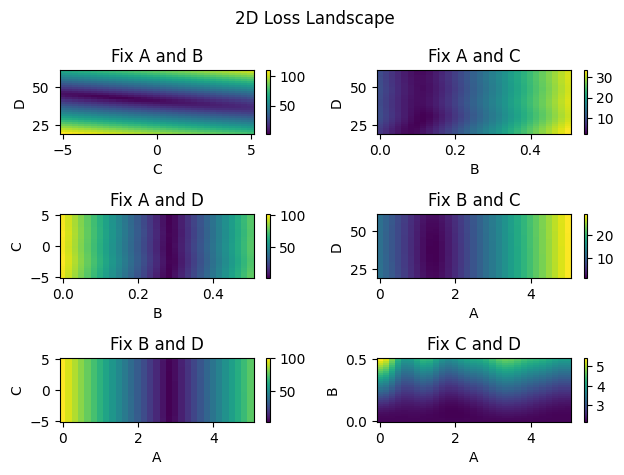

In [ ]:
# generate 2d loss landscape for each combination
fig, axs = plt.subplots(3, 2)

ax1 = axs[0,0]
ab = ax1.pcolor(c_r, d_r, save_ab, vmin=np.min(save_ab), vmax=np.max(save_ab))
ax1.set_title("Fix A and B")
ax1.set_xlabel("C")
ax1.set_ylabel("D")
fig.colorbar(ab, ax=ax1)

ax2 = axs[0,1]
ac = ax2.pcolor(b_r, d_r, save_ac, vmin=np.min(save_ac), vmax=np.max(save_ac))
ax2.set_title("Fix A and C")
ax2.set_xlabel("B")
ax2.set_ylabel("D")
fig.colorbar(ac, ax=ax2)

ax3 = axs[1,0]
ad = ax3.pcolor(b_r, c_r, save_ad, vmin=np.min(save_ad), vmax=np.max(save_ad))
ax3.set_title("Fix A and D")
ax3.set_xlabel("B")
ax3.set_ylabel("C")
fig.colorbar(ad, ax=ax3)

ax4 = axs[1,1]
bc = ax4.pcolor(a_r, d_r, save_bc, vmin=np.min(save_bc), vmax=np.max(save_bc))
ax4.set_title("Fix B and C")
ax4.set_xlabel("A")
ax4.set_ylabel("D")
fig.colorbar(bc, ax=ax4)

ax5 = axs[2,0]
bd = ax5.pcolor(a_r, c_r, save_bd, vmin=np.min(save_bd), vmax=np.max(save_bd))
ax5.set_title("Fix B and D")
ax5.set_xlabel("A")
ax5.set_ylabel("C")
fig.colorbar(bd, ax=ax5)

ax6 = axs[2,1]
cd = ax6.pcolor(a_r, b_r, save_cd, vmin=np.min(save_cd), vmax=np.max(save_cd))
ax6.set_title("Fix C and D")
ax6.set_xlabel("A")
ax6.set_ylabel("B")
fig.colorbar(cd, ax=ax6)

plt.suptitle("2D Loss Landscape")
plt.tight_layout()
plt.show()

In [ ]:
print("Relative number of of errors in dark blue region and minimum:")
print("AB:", (save_ab < 10).sum(), " Minimum:", np.sort(save_ab.flatten())[0])
print("AC:", (save_ac < 5).sum(), " Minimum:", np.sort(save_ac.flatten())[0])
print("AD:", (save_ad < 10).sum(), " Minimum:", np.sort(save_ad.flatten())[0])
print("BC:", (save_bc < 5).sum(), " Minimum:", np.sort(save_bc.flatten())[0])
print("BD:", (save_bd < 10).sum(), " Minimum:", np.sort(save_bd.flatten())[0])
print("CD:", (save_cd < 2.25).sum(), " Minimum:", np.sort(save_cd.flatten())[:3])

Relative number of of errors in dark blue region and minimum:
AB: 68  Minimum: 1.7541558868622196
AC: 195  Minimum: 2.1560755682024486
AD: 97  Minimum: 2.510105967310428
BC: 209  Minimum: 1.6840559504900365
BD: 93  Minimum: 1.9643117040739404
CD: 148  Minimum: [2.16936261 2.17050672 2.17173451]


For the 2D loss landscape, the minima can be observed by the dark blue region. As there are 31x31 errors calculated since there were 31 different values for the each of the two swept parameters with one absolute minimum. While fixing most variables gives one distinct region being the minimum, fixing C and D gives a larger range of dark blue, with some lighter shades in between, meaning there are more minimums. Based on my swept values for the parameters, there seem to be three minima. Otherwise in the other combinations, there is one distinct region that surrounds the minimum.

## Problem 2iii

In [ ]:
# training data is the first 20 data points
x_train = x[:20]
y_train = y[:20]

In [ ]:
# define the objective functions for line (Ax + B) and parabola (Ax^2 + Bx + C)
def fit_line(c, x, y):
    model = c[0] * x + c[1]
    er = np.sqrt(np.sum((model-y)**2)/len(x))
    return er

def fit_parab(c, x, y):
    model = c[0] * x ** 2 + c[1] * x + c[2]
    er = np.sqrt(np.sum((model-y)**2)/len(x))
    return er

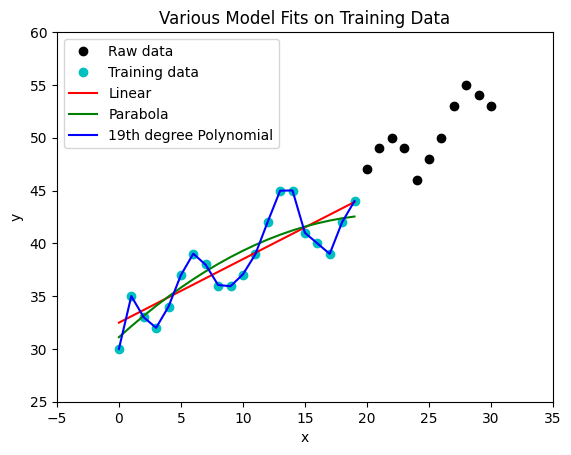

In [ ]:
# set the initial guess for the parameters on line and parabola functions
line0 = np.array([1, 20])
parab0 = np.array([1, 5, 20])

# perform optimization and save parameters
res_line = opt.minimize(fit_line, line0, args=(x_train, y_train))
res_parab = opt.minimize(fit_parab, parab0, args=(x_train, y_train))
res_poly = np.polyfit(x_train, y_train, 19, full=True)

# get the optimized parameters
mins_line = res_line.x
mins_parab = res_parab.x
mins_poly = res_poly[0]

# generate data for plotting
y_line = (mins_line[0] * x_train + mins_line[1])
y_parab = (mins_parab[0] * x_train ** 2 + mins_parab[1] * x_train + mins_parab[2])
y_poly = np.polyval(mins_poly, x_train)

# plot the training and raw data and the fitted curves
plt.figure(4)
plt.plot(x[-11:], y[-11:], 'ko', label='Raw data')
plt.plot(x_train, y_train, 'co', label='Training data')
plt.plot(x_train, y_line, 'r-', label='Linear')
plt.plot(x_train, y_parab, 'g-', label='Parabola')
plt.plot(x_train, y_poly, 'b-', label='19th degree Polynomial')

plt.title("Various Model Fits on Training Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,35)
plt.ylim(25, 60)
plt.legend()
plt.show()

In [ ]:
# the rest of the points are the test data
x_test = x[-11:]
y_test = y[-11:]

In [ ]:
# least-squares error for the trained models
line_er_tr = fit_line(mins_line, x_train, y_train)
parab_er_tr = fit_parab(mins_parab, x_train, y_train)
poly_er_tr = np.sqrt(np.sum((y_poly - y_train) ** 2) / len(x_train))

# least-squares error for the model on the test data
line_er_te = fit_line(mins_line, x_test, y_test)
parab_er_te = fit_parab(mins_parab, x_test, y_test)

poly_eval_test = np.polyval(mins_poly, x_test)
poly_er_te = np.sqrt(np.sum((poly_eval_test - y_test) ** 2) / len(x_test))

print("LSE for Line:")
print("Training:", line_er_tr)
print("Test:", line_er_te, "\n")
print("LSE for Parabola:")
print("Training:", parab_er_tr)
print("Test:", parab_er_te, "\n")
print("LSE for 19th degree Polynomial:")
print("Training:", poly_er_tr)
print("Test:", poly_er_te)

LSE for Line:
Training: 2.2427493868088466
Test: 3.3636415371732986 

LSE for Parabola:
Training: 2.1255393482814218
Test: 8.713676162354922 

LSE for 19th degree Polynomial:
Training: 0.02835144302630829
Test: 28626352734.190914


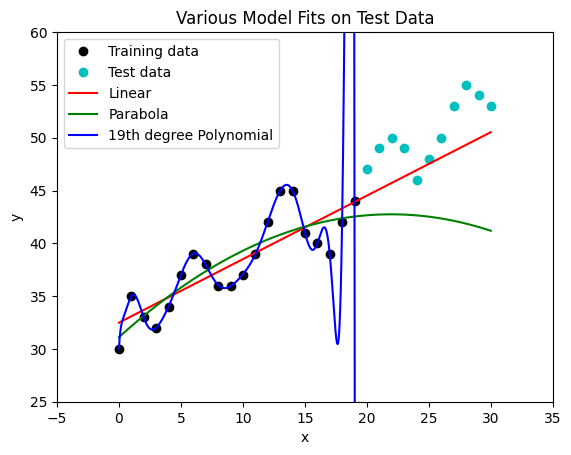

In [ ]:
# generate data for plotting
x_test_res = np.arange(x[0], x[30], 0.01)
y_line_test = (mins_line[0] * x_test_res + mins_line[1])
y_parab_test = (mins_parab[0] * x_test_res ** 2 + mins_parab[1] * x_test_res + mins_parab[2])
y_poly_test = np.polyval(mins_poly, x_test_res)

# plot the trained model (shows polynomial)
plt.figure(5)
plt.plot(x[:20], y[:20], 'ko', label='Training data')
plt.plot(x_test, y_test, 'co', label='Test data')
plt.plot(x_test_res, y_line_test, 'r-', label='Linear')
plt.plot(x_test_res, y_parab_test, 'g-', label='Parabola')
plt.plot(x_test_res, y_poly_test, 'b-', label='19th degree Polynomial')

plt.title("Various Model Fits on Test Data")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,35)
plt.ylim(25, 60)
plt.legend()
plt.show()

## Problem 2iv

In [ ]:
x_train2 = np.concatenate((x[:10], x[-10:]))
y_train2 = np.concatenate((y[:10], y[-10:]))

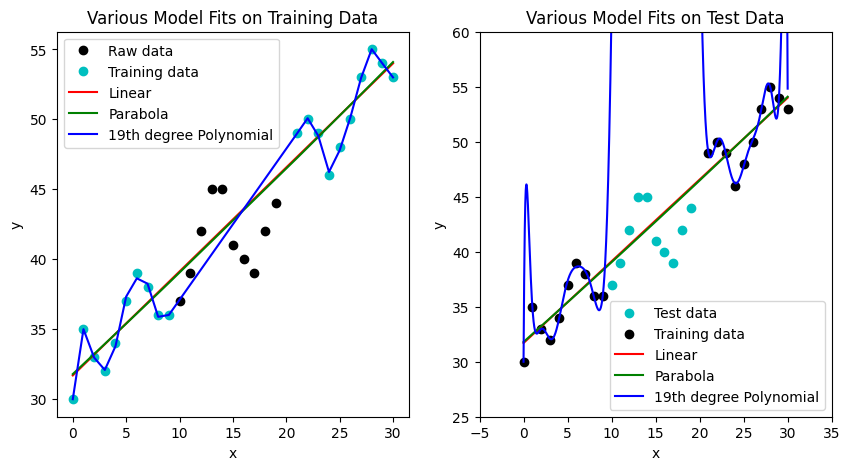

<Figure size 640x480 with 0 Axes>

In [ ]:
# set the initial guess for the parameters
line0 = np.array([1, 20])
parab0 = np.array([1, 5, 10])

# perform optimization and save parameters
res_line = opt.minimize(fit_line, line0, args=(x_train2, y_train2))
res_parab = opt.minimize(fit_parab, parab0, args=(x_train2, y_train2))
res_poly = np.polyfit(x_train2, y_train2, 19, full=True)

# get the optimized parameters
mins_line = res_line.x
mins_parab = res_parab.x
mins_poly = res_poly[0]

# generate data for plotting training results
y_line = (mins_line[0] * x_train2 + mins_line[1])
y_parab = (mins_parab[0] * x_train2 ** 2 + mins_parab[1] * x_train2 + mins_parab[2])
y_poly = np.polyval(mins_poly, x_train2)

x_test_res2 = np.arange(x[0], x[30], 0.01)
# generate data for plotting test results
y_line_test = (mins_line[0] * x_test_res2 + mins_line[1])
y_parab_test = (mins_parab[0] * x_test_res2 ** 2 + mins_parab[1] * x_test_res2 + mins_parab[2])
y_poly_test = np.polyval(mins_poly, x_test_res2)

# plot results of training
plt.figure(5, figsize=(10,5))
plt.subplot(121)
plt.title("Various Model Fits on Training Data")
plt.plot(x[10:20], y[10:20], 'ko', label='Raw data')
plt.plot(x_train2, y_train2, 'co', label='Training data')
plt.plot(x_train2, y_line, 'r-', label='Linear')
plt.plot(x_train2, y_parab, 'g-', label='Parabola')
plt.plot(x_train2, y_poly, 'b-', label='19th degree Polynomial')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# plot the trained model on all data
plt.subplot(122)
plt.title("Various Model Fits on Test Data")
plt.plot(x[10:20], y[10:20], 'co', label='Test data')
plt.plot(x_train2, y_train2, 'ko', label='Training data')
plt.plot(x_test_res2, y_line_test, 'r-', label='Linear')
plt.plot(x_test_res2, y_parab_test, 'g-', label='Parabola')
plt.plot(x_test_res2, y_poly_test, 'b-', label='19th degree Polynomial')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-5,35)
plt.ylim(25, 60)
plt.legend()

plt.show()
plt.tight_layout()

In [ ]:
x_test2 = x[10:20]
y_test2 = y[10:20]

# least-squares error for the trained models
line_er_tr = fit_line(mins_line, x_train2, y_train2)
parab_er_tr = fit_parab(mins_parab, x_train2, y_train2)
poly_er_tr = np.sqrt(np.sum((y_poly - y_train2) ** 2) / len(x_train2))

# least-squares error for the model on the test data
line_er_te = fit_line(mins_line, x_test2, y_test2)
parab_er_te = fit_parab(mins_parab, x_test2, y_test2)

poly_eval_test = np.polyval(mins_poly, x_test2)
poly_er_te = np.sqrt(np.sum((poly_eval_test - y_test2) ** 2) / len(x_test2))

print("LSE for Line:")
print("Training:", line_er_tr)
print("Test:", line_er_te, "\n")
print("LSE for Parabola:")
print("Training:", parab_er_tr)
print("Test:", parab_er_te, "\n")
print("LSE for 19th degree Polynomial:")
print("Training:", poly_er_tr)
print("Test:", poly_er_te)

LSE for Line:
Training: 1.8516699043294016
Test: 2.940307974977315 

LSE for Parabola:
Training: 1.85083641178975
Test: 2.905825819297066 

LSE for 19th degree Polynomial:
Training: 0.16381508563760222
Test: 507.47660243516526


For applying the model on the test data in the last two problems, using the first 10 and last 10 data points as training data with the middle 10 used as testing, the minimized error for each function has reduced. For the polynomial, by a lot. Each model has parameters that are optimized closer to the raw data as the error returned a lesser value than before, when only the first 20 data points made up the training dataset. This is likely due to the model being shaped to both the beginning and end points and therefore being more controlled throughout all datapoints instead of just being limited by the first few data points.